In [12]:
import numpy as np
import pandas as pd
import laspy as lp
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import scipy
import glob
import os
import datetime
import requests
from zipfile import ZipFile

In [14]:
# downloading the dataset

dataset_url = "https://obj.umiacs.umd.edu/dvs-independent/IROS_Dataset-2018-independent-motion.zip"
r = requests.get(dataset_url, allow_redirects=True)

open('IROS_Dataset.zip', 'wb').write(r.content)

61782336

In [16]:
# unzipping the dataset:

with ZipFile('IROS_Dataset.zip', 'r') as zipf:
    zipf.extractall() 

In [39]:
# choose sequence:

# filepath = "IROS_Dataset/fast_drone/events.txt"
filepath = "IROS_Dataset/light_variations/strobe/events.txt"
# filepath = "IROS_Dataset/what_is_background/events.txt"
# filepath = "IROS_Dataset/multiple_objects/1_obj/events.txt"
# filepath = "IROS_Dataset/multiple_objects/2_objs/events.txt"
# filepath = "IROS_Dataset/multiple_objects/3_objs/events.txt"
# filepath = "IROS_Dataset/occlusions/events.txt"

# Loading

In [32]:
events = pd.read_csv(filepath, delimiter=' ', header=None)
events = events.rename(columns={0:'ts', 1:'x', 2:'y', 3:'p'})
# events = events[['x', 'ts', 'y', 'p']]
events.sort_values('ts', axis=0)
events

,ts,x,y,p
0,1.519795e+09,189,155,0
1,1.519795e+09,188,155,0
2,1.519795e+09,145,155,0
3,1.519795e+09,13,155,0
4,1.519795e+09,178,153,0
...,...,...,...,...
1302116,1.519795e+09,183,25,0
1302117,1.519795e+09,181,33,1
1302118,1.519795e+09,170,32,0
1302119,1.519795e+09,6,35,0


In [33]:
events.iloc[0]['ts']*(10**6)

1519795201268862.0

In [34]:
datetime.datetime.fromtimestamp(events.iloc[0]['ts'])

datetime.datetime(2018, 2, 28, 5, 20, 1, 268862)

# Visualisation

In [35]:
events_slice = events.iloc[0:]
events_slice

,ts,x,y,p
0,1.519795e+09,189,155,0
1,1.519795e+09,188,155,0
2,1.519795e+09,145,155,0
3,1.519795e+09,13,155,0
4,1.519795e+09,178,153,0
...,...,...,...,...
1302116,1.519795e+09,183,25,0
1302117,1.519795e+09,181,33,1
1302118,1.519795e+09,170,32,0
1302119,1.519795e+09,6,35,0


In [36]:
events_slice_np = events_slice.to_numpy()
events_slice_np

array([[1.51979520e+09, 1.89000000e+02, 1.55000000e+02, 0.00000000e+00],
       [1.51979520e+09, 1.88000000e+02, 1.55000000e+02, 0.00000000e+00],
       [1.51979520e+09, 1.45000000e+02, 1.55000000e+02, 0.00000000e+00],
       ...,
       [1.51979521e+09, 1.70000000e+02, 3.20000000e+01, 0.00000000e+00],
       [1.51979521e+09, 6.00000000e+00, 3.50000000e+01, 0.00000000e+00],
       [1.51979521e+09, 1.66000000e+02, 4.70000000e+01, 1.00000000e+00]])

In [37]:
xyz = events_slice_np[:, :3]
polarity = events_slice_np[:, 3]

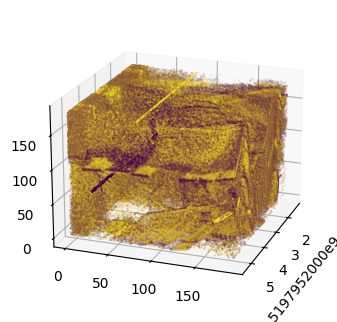

In [38]:
fig = plt.figure(figsize=(4, 4), dpi=100)
ax = plt.axes(projection='3d')
ax.azim = 20
ax.elev = 20
ax.scatter(xyz[:,0], xyz[:,1], xyz[:,2], c = polarity, s=0.01)

# fig.savefig('what_is_background_3d.jpg', dpi=400)

# Analysing frequency of events

In [42]:
import datetime

In [43]:
events_freq = events.copy()
events_freq['ts'] = events_freq['ts'].apply(lambda x: datetime.datetime.fromtimestamp(x))   # converting timestamps to datetime format                                                                    #convert timestamps to ts
events_freq['freq'] = 1                         # frequency of events
events_freq = events_freq.set_index('ts')       # set ts as index
events_freq_res = events_freq['freq'].resample('ms').sum().to_frame()       # resample to find events per ms

In [44]:
events_freq_res

,freq
ts,
2018-02-28 05:20:01.268,98
2018-02-28 05:20:01.269,329
2018-02-28 05:20:01.270,97
2018-02-28 05:20:01.271,230
2018-02-28 05:20:01.272,524
...,...
2018-02-28 05:20:05.364,258
2018-02-28 05:20:05.365,57
2018-02-28 05:20:05.366,67


<Figure size 2400x1600 with 0 Axes>

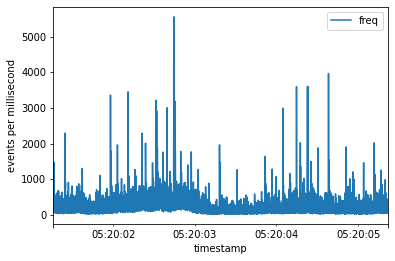

In [45]:
plt.figure(dpi=400)
plot = events_freq_res.iloc[0:].plot(xlabel = 'timestamp', ylabel = 'events per millisecond')
# fig1.savefig('what_is_background_event_rate.jpg', dpi=400)
fig = plot.get_figure()
fig.savefig("strobe.jpg", dpi=400)

Text(0.5, 1.0, 'histogram')

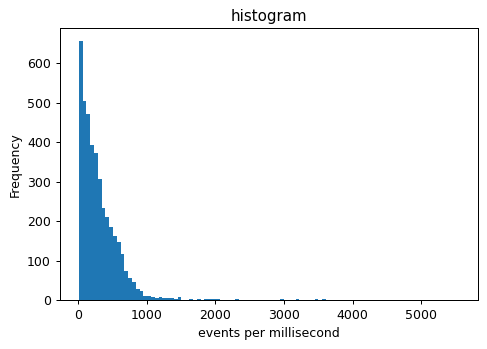

In [46]:
plt.figure(dpi=90)
ax1 = events_freq_res['freq'].plot.hist(bins=100)
ax1.set_xlabel('events per millisecond')
ax1.set_title('histogram')

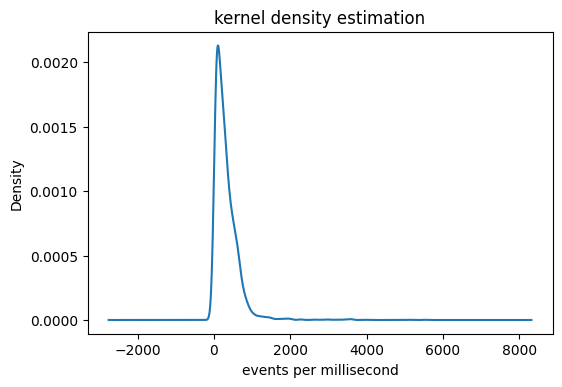

In [47]:
plt.figure(dpi=100)
ax2 = events_freq_res['freq'].plot.kde()
ax2.set_xlabel('events per millisecond')
ax2.set_title('kernel density estimation')
fig = ax2.get_figure()
fig.savefig("strobe_kde.jpg", dpi=400)

# np.mean(events_freq_res['freq'])


In [48]:
print('Mean: ', np.mean(events_freq_res['freq']))
print('Median: ', np.median(events_freq_res['freq']))
print('Std deviation: ', np.std(events_freq_res['freq']))

Mean:  317.5130455986345
Median:  235.0
Std deviation:  345.2364394302485


Total time, fps (frame-based) and bandwidth (frame-based

In [49]:
total_time_sec = (events_freq.reset_index()['ts'].iloc[-1] - events_freq.reset_index()['ts'].iloc[0]).total_seconds()

In [50]:
total_time_sec

4.099998